# Using least-squares fitting to calculate the Hubble Constant

## Introduction
This notebook contains data that has been processed in order to obtain a value for Hubble's Constant, $H_0$, through the measuring of the distances of type Ia Supernovae and their recession velocties. The following proportionality relation was proposed by Edwin Hubble and is now called Hubble's Law.
<br>Equation 1:
$ v = H_0 D$ [1]<br>
where v is the recession velocity, $H_0$ is Hubble's Constant and D is the distance from Earth to the Supernovae.

## 1) Plotting the Data Points
Below I will plot all the data points recorded of Distance against Velocity for 17 Type Ia Supernovae.

In [1]:
#-----------------------------------------------------------------------
# Date: 11/11/22 
#-----------------------------------------------------------------------
#import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

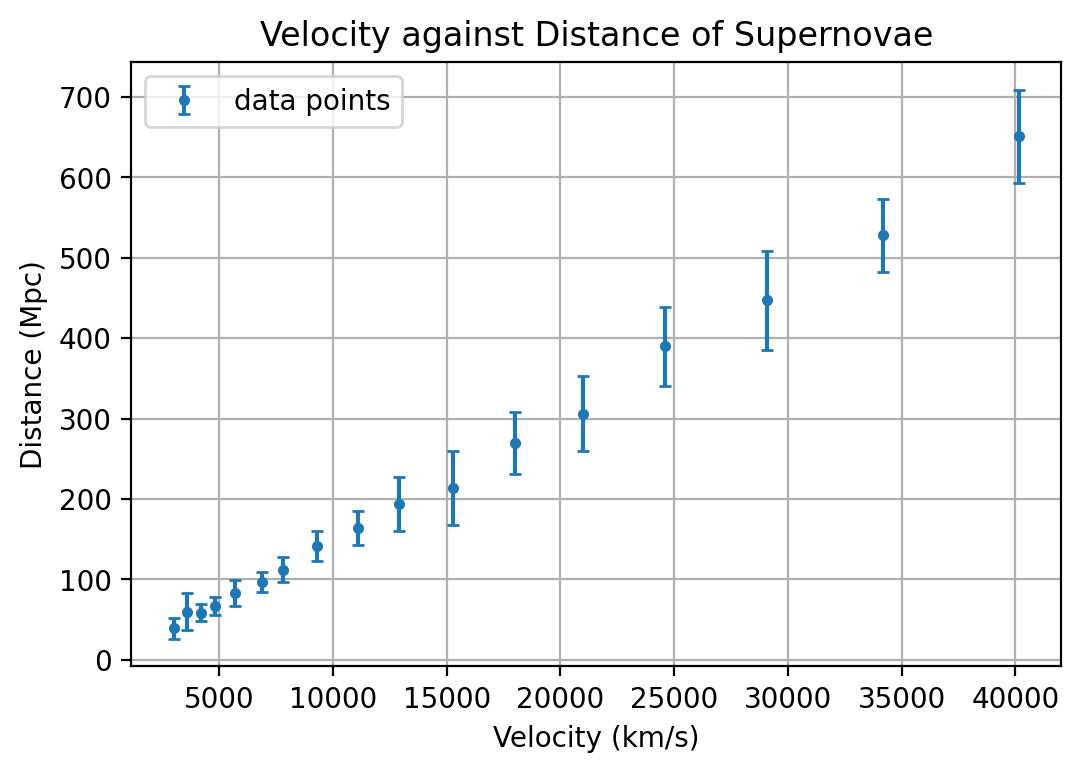

In [2]:
#extract data from csv file
vel, dist, dist_er = np.loadtxt("hubble_data.csv", delimiter=",", unpack = True)
#code adapted from Reference [4]
#create figure and graph
plt.figure(dpi=200)
plt.grid(True)
plt.title("Velocity against Distance of Supernovae")
#label axes
plt.xlabel("Velocity (km/s)")
plt.ylabel("Distance (Mpc)")
#plot datapoints
plt.errorbar(vel, dist, yerr = dist_er, fmt = ".", capsize=2, label = "data points")
plt.legend(loc="best")

## 2)  Linear Regression using NumPy
The following code will use the NumPy library to calculate the gradient and y-intercept using in-built functions to the NumPy library.

In [3]:
# code adapted from Reference [4]
poldegree = 1
# find coefficients using numpy for unweighted line
num_coeffs, num_error = np.polyfit(vel, dist, poldegree, cov = True)
num_grad, num_int = num_coeffs  # gradient has units Mpc*s/km and intercept Mpc
dnum_grad, dnum_int = np.sqrt(np.diag(num_error))
# find coefficients for weighted line
wnum_coeffs, wnum_error = np.polyfit(vel,dist, poldegree, w = 1/dist_er, cov = "unscaled")
wnum_grad, wnum_int = wnum_coeffs
dwnum_grad, dwnum_int = np.sqrt(np.diag(wnum_error))
# print unweighted coefficients
print(f"unweighted gradient = {num_grad} +- {dnum_grad} km^-1*s*Mpc")
print(f"unweighted intercept = {num_int} +- {dnum_int} Mpc")
print(f"unweighted gradient = {num_grad:.4f} +- {dnum_grad:.4f} km^-1*s*Mpc to 4 d.p.")
print(f"unweighted intercept = {num_int:.0f} +- {dnum_int:.0f} Mpc to 0 d.p.")
# print weighted coefficients
print(f"weighted gradient = {wnum_grad} +- {dwnum_grad} km^-1*s*Mpc") 
print(f"weighted intercept = {wnum_int} +- {dwnum_int} Mpc") 
print(f"weighted gradient = {wnum_grad:.3f} +- {dwnum_grad:.3f} km^-1*s*Mpc to 3dp") 
print(f"weighted intercept = {wnum_int:.0f} +- {dwnum_int:.0f} Mpc to 1 s.f") 

unweighted gradient = 0.01597939731196561 +- 0.0002206588105827228 km^-1*s*Mpc
unweighted intercept = -11.624040905828377 +- 4.078725830535066 Mpc
unweighted gradient = 0.0160 +- 0.0002 km^-1*s*Mpc to 4 d.p.
unweighted intercept = -12 +- 4 Mpc to 0 d.p.
weighted gradient = 0.01574034318901381 +- 0.000827025757910185 km^-1*s*Mpc
weighted intercept = -8.32585537874202 +- 7.37387236367192 Mpc
weighted gradient = 0.016 +- 0.001 km^-1*s*Mpc to 3dp
weighted intercept = -8 +- 7 Mpc to 1 s.f


The precision for the gradient and y-intercept were determined from the uncertainty to 1 significant figure, as this is most appropriate representation of our data according to the Data Analysis and Statistics Booklet [2], Chapter 5.6, which states "error should be quoted to one significant figure only".

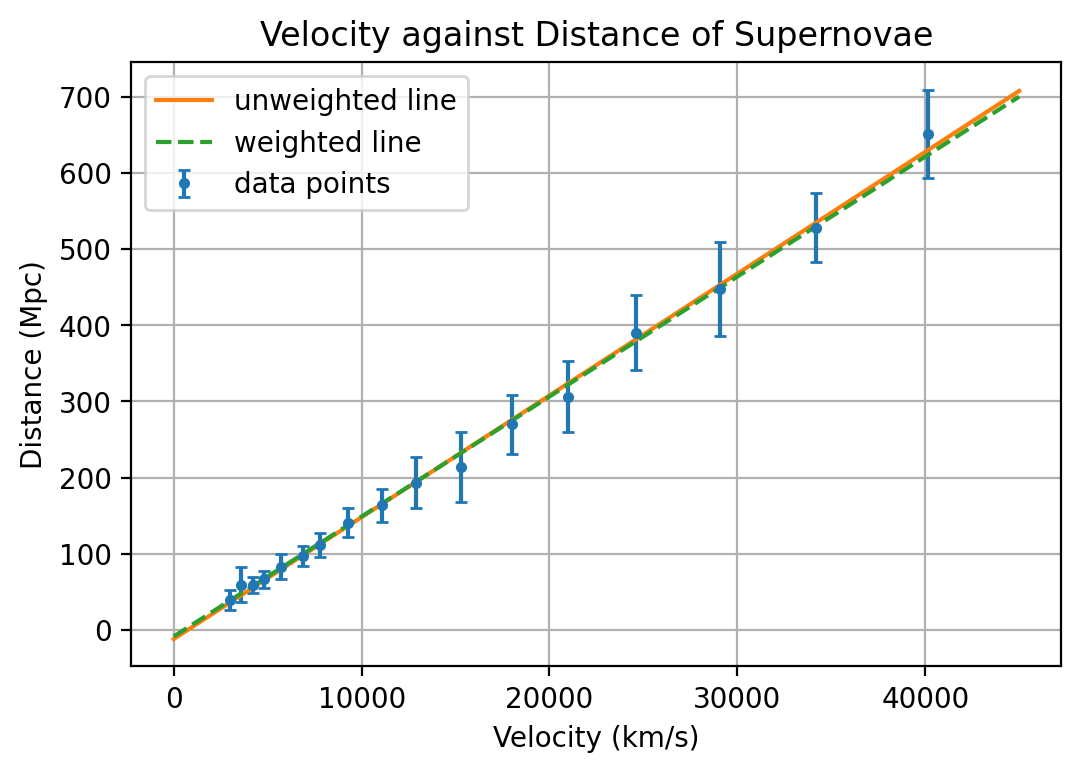

In [4]:
# create weighted and unweighted lines
# code adapted from Reference [4]
xline = np.linspace(0, 45000, 10)
num_unweight = num_grad *xline + num_int
num_weight = wnum_grad *xline + wnum_int
# plot graph
plt.figure(dpi=200)
plt.grid(True)
plt.title("Velocity against Distance of Supernovae")
# add axes labels
plt.xlabel("Velocity (km/s)")
plt.ylabel("Distance (Mpc)")
# plot datapoints
plt.errorbar(vel, dist, yerr = dist_er, fmt = ".", capsize=2, label = "data points")
# plot weighted and unweighted fits
plt.plot(xline, num_unweight, label="unweighted line")
plt.plot(xline, num_weight, "--", label = "weighted line")
plt.legend(loc="best")

## 3) Linear Regression from Scratch
The following section is intended to reproduce the values obtained via Linear regression but instead defining and calculating the values without previously defined functions. 

For the unweighted fit the following equations need to be used [2,3]:
<br>
Equation (16):
$$
d_i = y_i - y_\mathrm{line}(x_i) = y_i - mx_i -c
$$
Equation (17):
$$
S=\sum_{i=1}^n d_i^{2}
$$
Equation (22):
$$m=\frac{\sum_{i=1}^n(x_i-\bar{x})y_i}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

Equation (23):
$$c=\bar{y}-m\bar{x}$$

Equation (24):
$$\Delta m = \sqrt{\frac{S}{(n-2)D}}$$

Equation (25):
$$\Delta c = \sqrt{\left( \frac{1}{n}+\frac{\bar{x}^2}{D} \right)
\frac{S}{(n-2)}}$$

Equation (26):
$$D=\sum_{i=1}^n (x_i-\bar{x})^2$$

In [5]:
# function that will return coefficients and errors
def unweighted_fit(xarray, yarray):
    """Calculates and outputs two lists, the first contains the gradient and y-intercept values
    and the second contains the uncertainties for the gradient and y-intercept values. This is the 
    unweighted fit, so the fit treats each data point equally when fitting a straight line."""
    # average values for x and y
    avg_x = np.mean(xarray)
    avg_y = np.mean(yarray)
    n = len(xarray)
    
    # calculate gradient and y-intercept
    sum_square = np.sum(np.square((xarray-avg_x))) # Equation 26
    grad = (np.sum((xarray-avg_x)*yarray))/sum_square # Equation 22
    intercept = avg_y - (grad*avg_x) # Equation 23
    res_sum = np.sum(np.square((yarray-((grad*xarray)+intercept)))) # Equation 17
    
    # calculate errors for both
    delta_grad = np.sqrt(res_sum/((n-2)*sum_square)) # Equation 24
    delta_int = np.sqrt(((1/n)+(np.square(avg_x)/sum_square))*(res_sum/(n-2))) # Equation 25
    #return values for coefficients and errors
    return [grad, intercept], [delta_grad, delta_int]

For the weighted fit  the following  extra equation need to be used [2,3]:<br>
Equation (11):
$$
w_i = \frac {1}{(\Delta x_i)^2}
$$
Equation (31):
$$
m = \frac
{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i y_i}
{\sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i\right)^2}
$$

Equation (32):
$$
c = \frac
{\sum_{i=1}^n w_i y_i - m\sum_{i=1}^n w_i x_i}
{\sum_{i=1}^n w_i}
$$

Equation (33):
$$
\Delta m = \sqrt{\frac{
\sum_i w_i
}{
\sum_i w_i \sum_i w_i x_i^2 - \left( \sum_i w_i x_i \right)^2
}}
$$

Equation (34):
$$
\Delta c = \sqrt{\frac{
\sum_i w_i x_i^2
}{
\sum_i w_i \sum_i w_i x_i^2 - \left( \sum_i w_i x_i \right)^2
}}
$$


In [6]:
# function that will return coefficients and errors
def weighted_fit(xarray, yarray, yerror):
    """Calculates and outputs two lists, the first contains the gradient and y-intercept values
    and the second contains the uncertainties for the gradient and y-intercept values. This is the 
    weighted fit, so the best line of best fit considers the errors for each data point."""
    # create array of weights
    weights = (1/(np.square(yerror)))
    
    # define sums used in each formula
    sum_weights = np.sum(weights)
    sum_wxy = np.sum((weights*xarray*yarray))
    sum_wx = np.sum((weights*xarray))
    sum_wy = np.sum((weights*yarray))
    sum_wxsquare = np.sum((weights*(np.square(xarray))))
    
    # calculate gradient and y-intercept
    grad = ((sum_weights*sum_wxy)-(sum_wx*sum_wy))/((sum_weights*sum_wxsquare)-(np.square(sum_wx))) # Equation 31
    intercept = ((sum_wy)-(grad*sum_wx))/sum_weights # Equation 32
    
    # calculate errors for both
    delta_grad = np.sqrt((sum_weights/((sum_weights*sum_wxsquare)-(np.square(sum_wx))))) # Equation 33
    delta_int = np.sqrt((sum_wxsquare/((sum_weights*sum_wxsquare)-(np.square(sum_wx))))) # Equation 34
    # return values for coefficients and errors
    return [grad, intercept], [delta_grad, delta_int]

In [7]:
# unweighted fit coefficients and error
hand_coeffs, hand_error = unweighted_fit(vel, dist)
hand_grad, hand_int = hand_coeffs
dhand_grad, dhand_int = hand_error
# weighted fit coefficients and error
whand_coeffs, whand_error = weighted_fit(vel, dist, dist_er)
whand_grad, whand_int = whand_coeffs
dwhand_grad, dwhand_int = whand_error
# print weighted and unweighted coefficients
print(f"unweighted gradient = {hand_grad} +- {dhand_grad} km^-1*s*Mpc")
print(f"unweighted intercept = {hand_int} +- {dhand_int} Mpc")
print(f"unweighted gradient = {hand_grad:.4f} +- {dhand_grad:.4f} km^-1*s*Mpc to 4 d.p.")
print(f"unweighted intercept = {hand_int:.0f} +- {dhand_int:.0f} Mpc to 2 s.f.")
print(f"weighted gradient = {whand_grad} +- {dwhand_grad} km^-1*s*Mpc") #units
print(f"weighted intercept = {whand_int} +- {dwhand_int} Mpc") #units
print(f"weighted gradient = {whand_grad:.4f} +- {dwhand_grad:.4f} km^-1*s*Mpc to 4dp") #units
print(f"weighted intercept = {whand_int:.0f} +- {dwhand_int:.0f} Mpc to 1 s.f") #units 

unweighted gradient = 0.015979397311965605 +- 0.00022065881058272276 km^-1*s*Mpc
unweighted intercept = -11.624040905828451 +- 4.078725830535065 Mpc
unweighted gradient = 0.0160 +- 0.0002 km^-1*s*Mpc to 4 d.p.
unweighted intercept = -12 +- 4 Mpc to 2 s.f.
weighted gradient = 0.01574034318901382 +- 0.0008270257579101854 km^-1*s*Mpc
weighted intercept = -8.325855378742101 +- 7.37387236367192 Mpc
weighted gradient = 0.0157 +- 0.0008 km^-1*s*Mpc to 4dp
weighted intercept = -8 +- 7 Mpc to 1 s.f


Comparing the NumPy values to the calculated values for the unweighted fit:<br><br>
unweighted calculated gradient = 0.015979397311965605 +- 0.00022065881058272276 km^-1*s*Mpc <br>
unweighted NumPy gradient = 0.01597939731196561 +- 0.0002206588105827228 km^-1*s*Mpc<br>
unweighted  calculated intercept = -11.624040905828451 +- 4.078725830535065 Mpc<br>
unweighted NumPy intercept = -11.624040905828377 +- 4.078725830535066 Mpc<br><br>
It is clear that the calculated value for the gradient is more accurate to 1 more decimal place compared to the NumPy value, and the uncertainties of both are identical exept the calculated value is also more accurate to 1 more decimal place. However the y-intercept values are only the same up to the 12 decimal place (which is probably more than enough precision). However, when both considering the truncated precision when representing the data, they are identical.
<br><br>
Comparing the NumPy values to the calculated values for the weighted fit:<br><br>
weighted calculated gradient = 0.01574034318901382 +- 0.0008270257579101854 km^-1*s*Mpc<br>
weighted NumPy gradient = 0.01574034318901381 +- 0.000827025757910185 km^-1*s*Mpc<br>
weighted calculated intercept = -8.325855378742101 +- 7.37387236367192 Mpc<br>
weighted NumPy intercept = -8.32585537874202 +- 7.37387236367192 Mpc<br><br>

Again with the weighted gradient, the values are identical until the 15th decimal place and the intercept values are identical until the 12th decimal place, even though the uncertainties are identical. However, when both considering the truncated precision when representing the data, they are identical.<br><br>

Advantages and Disadvantages:<br>
Although using calculated values from our own defined function gives us more freedom on what formulae we use, the ease of use and relatively quick coding time to use NumPy over the calculated functions provide a more compelling reason as the difference between values is incredibly miniscule.

## 4) Goodness of Fit

When looking at how good a line of best fit is, we need to compare the residuals of each line and determine the reduced chi-squared statistic for each line. From the value of the reduced chi square calculation we can deduce how good a fit we have made. To calculate this, we need to find the normalised residuals using the following equation [2,3]:
<br>
Equation (36):
$$
\mathrm{Normalised\ residual} = \frac{d_i}{\Delta y_i}
$$
The formula for the $\chi^2$ and $\chi_{reduced}^2$ are used to determine how good a fit is [2]:
<br>
Equation (37):
$$
\chi^2 = \sum_{i=1}^n (\frac{d_i}{\Delta y_i})^2 $$
Equation (38):
$$
\chi_{reduced}^2 = \frac{\chi^2}{K} $$
where K is the number of degrees of freedom.

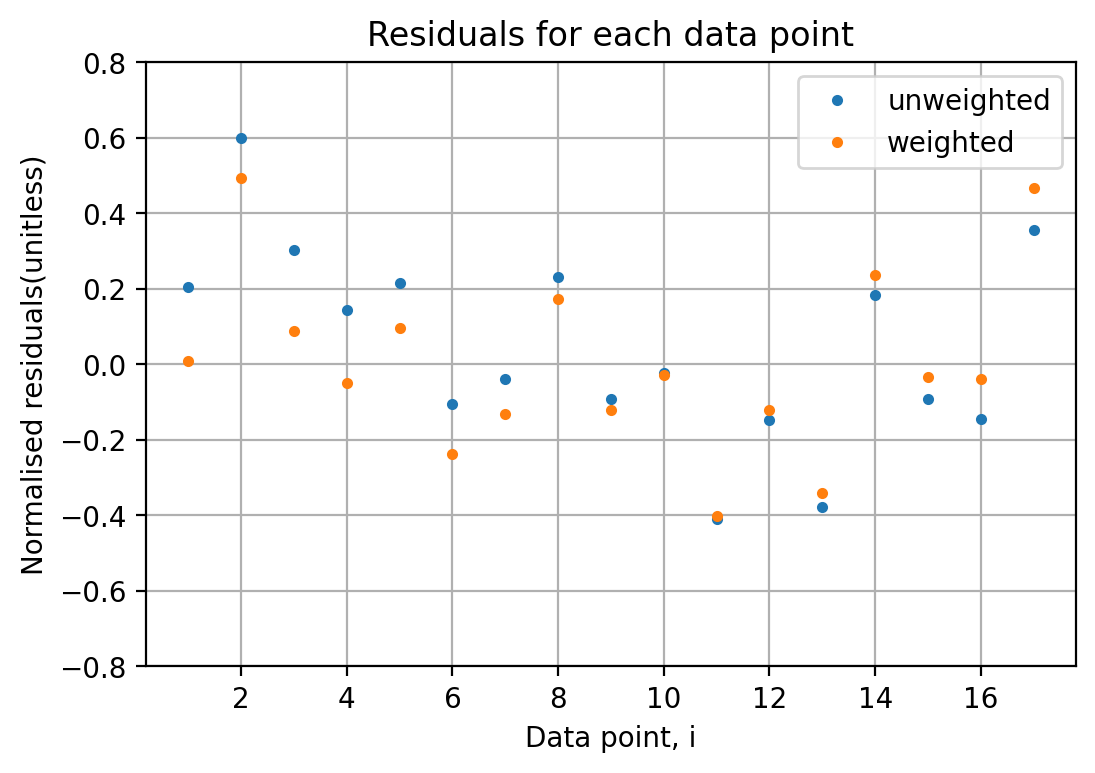

In [8]:
# calculate residuals for different fits
resid = (dist - ((num_grad*vel)+num_int))
wresid = (dist - ((wnum_grad*vel)+wnum_int))
norm_resid = resid/dist_er
wnorm_resid = wresid/dist_er
# create array for datapoints
datapoints = np.arange(1, len(resid)+1)

# create graph
plt.figure(dpi = 200)
plt.grid(True)
plt.title("Residuals for each data point")
# add axes labels
plt.ylabel("Normalised residuals(unitless)")
plt.xlabel("Data point, i")

# plot weighted and unweighted fit normalised residuals
plt.plot(datapoints, norm_resid,".", label ="unweighted")
plt.plot(datapoints, wnorm_resid,".", label ="weighted")
plt.ylim(-0.8,0.8)
plt.legend(loc="best")

In [9]:
# calculate the chi squared values for different fits
weight_chi = np.sum(np.square(wnorm_resid))
unweight_chi = np.sum(np.square(norm_resid))
# output chi squared values
print(f"The chi squared test for the unweighted fit produced:{unweight_chi:.3f}")
print(f"The chi squared test for the weighted fit produced:{weight_chi:.3f}")
deg_freed = len(datapoints)- 2
weight_red = weight_chi/deg_freed
unweight_red = unweight_chi/deg_freed
print(f"The reduced chi squared test for the unweighted fit produced:{unweight_red:.3f}")
print(f"The reduced chi squared test for the weighted fit produced:{weight_red:.3f}")

The chi squared test for the unweighted fit produced:1.160
The chi squared test for the weighted fit produced:0.950
The reduced chi squared test for the unweighted fit produced:0.077
The reduced chi squared test for the weighted fit produced:0.063


A good fit will have a reduced chi squared value near 1 [2]. The reduced chi squared is very small for both fits, which either suggests over fitting or overestimated error bars.However, both fits are linear, so cannot have been overfitted as linear fits only have 2 parameters [2]. However, if we increased the order of polynomial for the fit, our degrees of freedom will be smaller, giving us a value closer to 1. A polynomial of order 15 would be required to do this, but our equations and theory show no evidence for the data to form a polynomial relationship.  Looking at the normalised residuals suggests that error bars have been overestimated, as all data points lie between 1 and -1 rather than 68% of data points lying between 1 and -1 [2].  Further to this, the residuals do not show any sign of systematic error, instead producing a more random spread of residuals which is to be expected.

##  5) Hubble Constant

From analysing the graph, we can determine that the gradient forms the following equation:
$$ gradient = \frac{D}{v} $$
thus:
$$ gradient = \frac{1}{H_0}$$
so:
$$ H_0 = \frac{1}{gradient} $$
The error in $H_0$ can be calculated using the formula taken from the DAS booklet [2].
$$ \Delta Z = |\frac{\partial Z}{\partial A}| * \Delta A $$
For the error in $H_0$ this would be:
$$ \Delta H_0 = \frac{1}{(gradient)^2} * \Delta gradient $$

In [10]:
wHubble = 1/wnum_grad
dwHubble = (1/(np.square(wnum_grad)))*dwnum_grad

Hubble = 1/num_grad
dHubble = (1/(np.square(num_grad)))*dnum_grad
print(f"The unweighted value for Hubble's Constant is:{Hubble}+- {dHubble} km/s/Mpc")
print(f"The unweighted value for Hubble's Constant is:{Hubble:.1f}+- {dHubble:.1f} km/s/Mpc")
print(f"The weighted value for Hubble's Constant is:{wHubble} +- {dwHubble} km/s/Mpc")
print(f"The weighted value for Hubble's Constant is:{wHubble:.0f} +- {dwHubble:.0f} km/s/Mpc")

The unweighted value for Hubble's Constant is:62.58058301430338+- 0.8641725807248799 km/s/Mpc
The unweighted value for Hubble's Constant is:62.6+- 0.9 km/s/Mpc
The weighted value for Hubble's Constant is:63.53101631849831 +- 3.3380331223198914 km/s/Mpc
The weighted value for Hubble's Constant is:64 +- 3 km/s/Mpc


<p>When considering both the weighted and unweighted values for $H_0$ the unweighted value may be more appropriate: This is due to having a closer reduced chi squared value to 1 compared to the weighted fit. Included in this conclusion is the fact that the error is smaller for the unweighted value and our data already suggests over-estimated errors used. <p>
<p>When using my value for $H_0$ in the following equations:<p>
$$ \rho_c = \frac{3H_0^2}{8\pi G} $$ where G is Newton's Gravitational constant and $\rho_c$ is the critical density of the Universe [5].
$$ t_H = \frac{1}{H_0} $$
    and $t_H$ is the Hubble time, which shows the age of the Universe if it had expanded linearly [5].
<p> From these equations we obtain a value of $\rho_c = 7.4 * 10^{-27} kg/m^3$ and $t_H = 4.9 * 10^{17} s =   15.6$  billion years when using the value calculated for $H_0$ above. However, the value for the Hubble time, which is an approximation of the age of the Universe, varies by 2 billion years when compared with other values for the age of the Universe  (13.7 billion years) [6].<p>

## References:
[1] Chislett C, Dash L, Lemos P and Waugh B. *PHAS0007 Reading Week Assignment 2022: Using least-squares fitting to calculate the Hubble constant.* [online] UCL: London; 2022 [Accessed 11 November 2022]. Available from: https://moodle.ucl.ac.uk/mod/resource/view.php?id=4305191

[2] Llorente-Garcia I and Jones P. *Data Analysis and Statistics Booklet, Practical Physics and Computing 1: Module PHAS0007.* [online] UCL: London; 2021 [Accessed 11 November 2022]. Available from: https://moodle.ucl.ac.uk/mod/resource/view.php?id=4305408

[3] Dash L, Waugh B. *PHAS0007 Computing mid-term assignment: Supplementary notebook.* [online] UCL: London; 2022 [Accessed 11 November 2022]. Available from https://moodle.ucl.ac.uk/mod/resource/view.php?id=4305192 

[4] Chislett B, Dash L, Waugh B. *PHAS0007 Computing Unit 4: Linear regression.* [online] UCL: London; 2022 [Accessed 11 November 2022]. Available from https://moodle.ucl.ac.uk/mod/resource/view.php?id=4305180

[5] Hubble's law [Internet]. Wikipedia. Wikimedia Foundation; 2022 [cited 2022Nov16]. Available from: https://en.wikipedia.org/wiki/Hubble%27s_law 
[6] WMAP- age of the universe [Internet]. NASA. NASA; 2012 [cited 2022Nov18]. Available from: https://wmap.gsfc.nasa.gov/universe/uni_age.html 